In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# Sensitivity to PE (IE)

In [30]:
yoo = pd.read_pickle("data/yoo.pkl")
yoo['type'] = 'human'
dg = pd.read_pickle("data/DG_yoo_apr1_dynamics.pkl")
rl_l = pd.read_pickle("data/RL_l_yoo_apr1_dynamics.pkl")
adm = pd.read_pickle("data/ADM_yoo_apr1_dynamics.pkl")
combined = pd.concat([yoo,  dg, rl_l, adm], ignore_index=True)
dfs = []
columns = ['type', 'sid', 'block', 'trial', 'stage', 'deltaR', "deltaR_optimal"]
for model_type in combined['type'].unique():
    for sid in combined['sid'].unique():
        print(model_type, sid)
        for block in combined.query("sid==@sid")['block'].unique():
            for trial in combined['trial'].unique():
                stages = combined['stage'].unique()
                for s in range(len(stages)-1):
                    stage_old = stages[s]
                    stage_new = stages[s+1]
                    # print(model_type, sid, block, trial, stage_old, stage_new)
                    subdata = combined.query("type==@model_type & sid==@sid & block==@block & trial==@trial")
                    response_old = subdata.query("stage==@stage_old")['response'].to_numpy()[0]
                    response_new = subdata.query("stage==@stage_new")['response'].to_numpy()[0]
                    observation = subdata.query("stage==@stage_old")['observation'].to_numpy()[0]
                    deltaR = np.abs(response_new - response_old)
                    # print(response_old, response_new, observation, deltaR)
                    optimal = combined.query("type=='human' & sid==@sid & block==@block & trial==@trial")
                    avg_old = optimal.query("stage==@stage_old")['mean'].to_numpy()[0]
                    avg_new = optimal.query("stage==@stage_new")['mean'].to_numpy()[0]
                    deltaR_optimal = np.abs(avg_new - avg_old)
                    dfs.append(pd.DataFrame([[model_type, sid, block, trial, stage_old, deltaR, deltaR_optimal]], columns=columns))
deltaRs = pd.concat(dfs, ignore_index=True)

human 1
human 2
human 3
human 4
human 5
human 6
human 7
human 8
human 10
human 11
human 13
human 14
human 15
human 16
human 17
human 18
human 19
human 20
human 21
human 23
human 24
human 25
human 26
human 27
human 29
human 30
human 32
human 33
human 34
human 36
human 37
human 38
human 39
human 40
human 41
human 42
human 44
human 46
DG 1
DG 2
DG 3
DG 4
DG 5
DG 6
DG 7
DG 8
DG 10
DG 11
DG 13
DG 14
DG 15
DG 16
DG 17
DG 18
DG 19
DG 20
DG 21
DG 23
DG 24
DG 25
DG 26
DG 27
DG 29
DG 30
DG 32
DG 33
DG 34
DG 36
DG 37
DG 38
DG 39
DG 40
DG 41
DG 42
DG 44
DG 46
RL_l 1
RL_l 2
RL_l 3
RL_l 4
RL_l 5
RL_l 6
RL_l 7
RL_l 8
RL_l 10
RL_l 11
RL_l 13
RL_l 14
RL_l 15
RL_l 16
RL_l 17
RL_l 18
RL_l 19
RL_l 20
RL_l 21
RL_l 23
RL_l 24
RL_l 25
RL_l 26
RL_l 27
RL_l 29
RL_l 30
RL_l 32
RL_l 33
RL_l 34
RL_l 36
RL_l 37
RL_l 38
RL_l 39
RL_l 40
RL_l 41
RL_l 42
RL_l 44
RL_l 46
ADM 1
ADM 2
ADM 3
ADM 4
ADM 5
ADM 6
ADM 7
ADM 8
ADM 10
ADM 11
ADM 13
ADM 14
ADM 15
ADM 16
ADM 17
ADM 18
ADM 19
ADM 20
ADM 21
ADM 23
ADM 24
ADM 25
ADM 

In [31]:
deltaRs.to_pickle("data/temporal_weighting.pkl")

# Plot deltaR vs stage for each sid

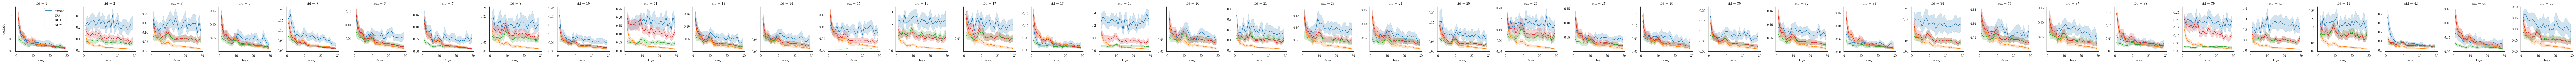

In [37]:
g = sns.FacetGrid(deltaRs, col="sid", sharey=False, sharex=True, legend_out=False)
g.map_dataframe(sns.lineplot, x="stage", y='deltaR', hue='type', palette=palette[:4])
# g.map_dataframe(sns.lineplot, x="stage", y='deltaR_optimal', color='k')
g.add_legend()
g.savefig("plots/temporal_weighting_all_sid.jpg", dpi=100)
plt.show()

### Averaged over all models

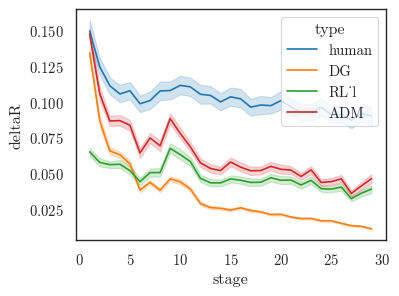

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))
sns.lineplot(deltaRs, x='stage', y='deltaR', hue='type', palette=palette[:4])
fig.savefig("plots/temporal_weighting_averaged.jpg", dpi=600)